In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.shape

(54808, 14)

In [6]:
test.shape

(23490, 13)

In [7]:
#lets take a look on null values
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
# we can say both train and test data having null values in same features ( education and previous rating)
# lets look first to the training and fill those values

In [11]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [12]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [13]:

train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


## General Hypothisis (Assumptions):

1] An employee who is higher educated can get promotions

2] An employee who has been in the office for a long year have most of the chances to get promotions

3] An employee who had a good ratings in the previous can get promotions

4] An employee who had won awards can get promotions


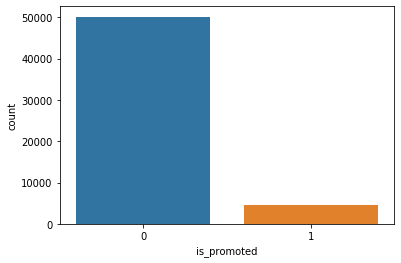

In [14]:
# check whether data is balanced or not
sns.countplot(train['is_promoted'])

it is look like our data is imbalanced, we will take care it in feature engineering.

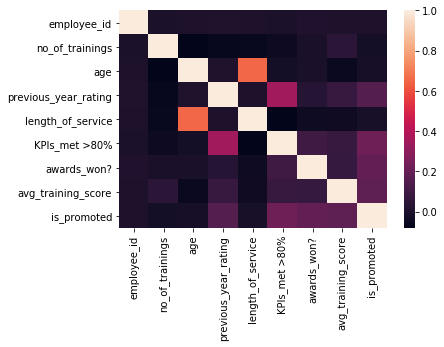

In [15]:
sns.heatmap(train.corr())

In [16]:
# we got some insights 
# heatmap shows age is highly correalted with length of service

In [17]:
# lets start with Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

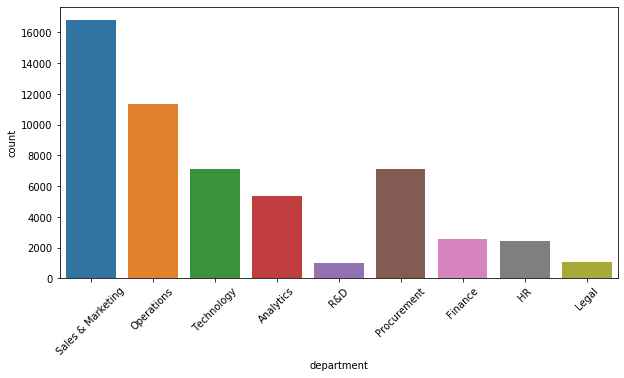

In [18]:
# first we go through the department, which department got more promotions
plt.figure(figsize=(10,5))
sns.countplot(train['department'])
plt.xticks(rotation=45)

we can see most of the employees are in sales and marketing department and least are in R&D and Legal.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

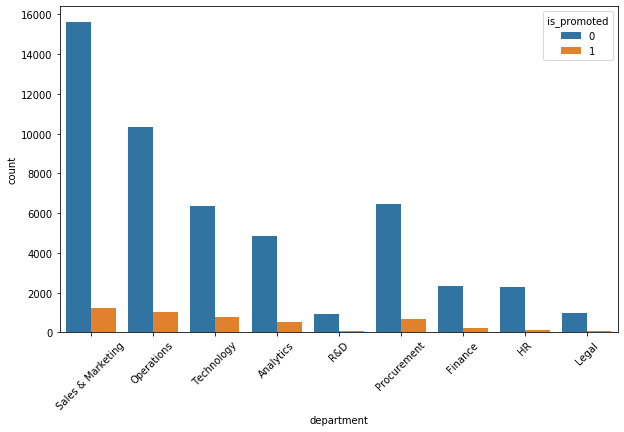

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(train['department'],hue=train['is_promoted'])
plt.xticks(rotation=45)

employees from Sales and marketing and operations department got most promotions

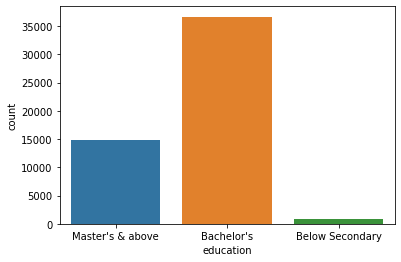

In [20]:
# lets look at for education
sns.countplot(train['education'])


We can see that most of the employees have bachelors degree

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

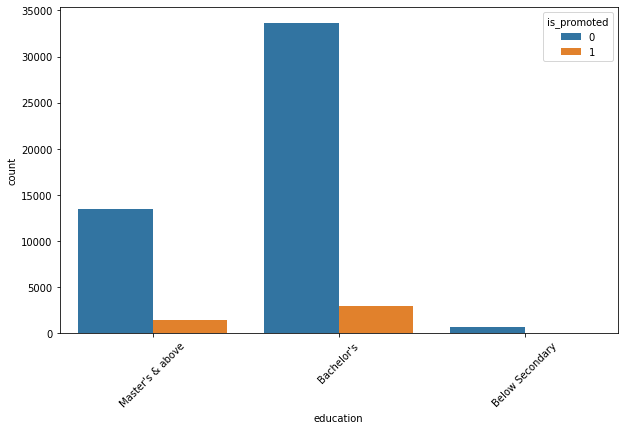

In [21]:
# let's check does education can put any impact on the promotion
plt.figure(figsize=(10,6))
sns.countplot(train['education'],hue=train['is_promoted'])
plt.xticks(rotation=45)


we can see that Below Secondary have not got any promotions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

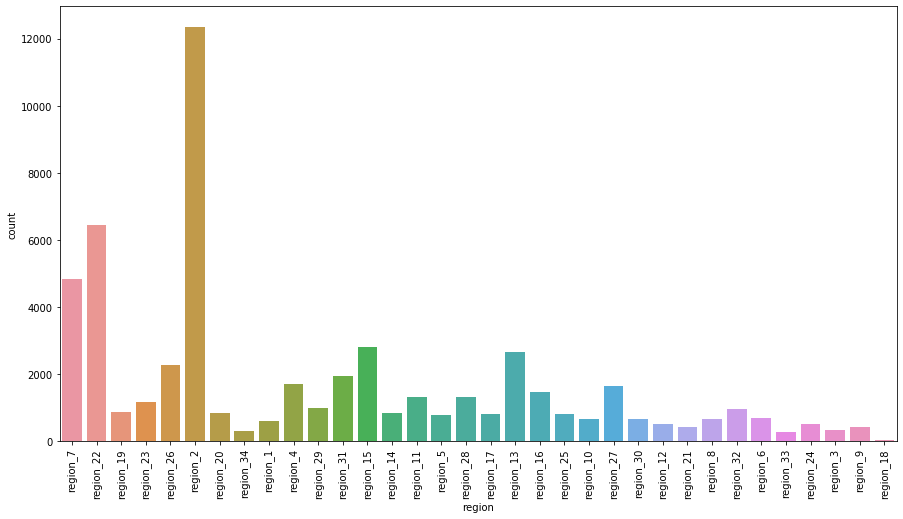

In [22]:
#region
plt.figure(figsize=(15,8))
sns.countplot(train['region'])
plt.xticks(rotation=90)

<Figure size 720x360 with 0 Axes>

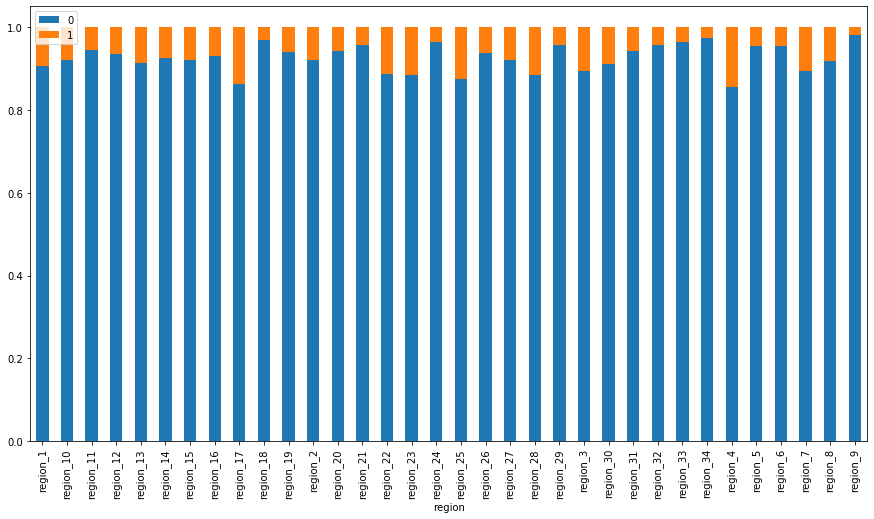

In [23]:
plt.figure(figsize=(10,5))
region=pd.crosstab(train['region'],train['is_promoted']) 
region.div(region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(15,8))
plt.legend(loc='best')

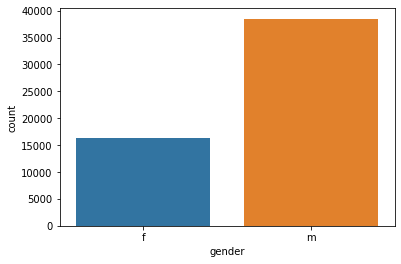

In [24]:
# next is gender
sns.countplot(train['gender'])

male staff is there in a huge amount

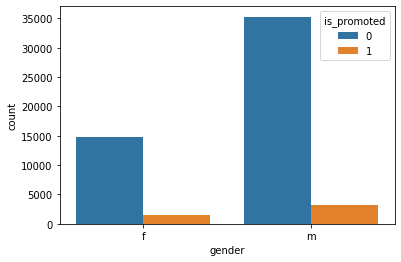

In [25]:
# check who got most promotions
sns.countplot(train['gender'],hue=train['is_promoted'])

male got most promotions

<Figure size 720x360 with 0 Axes>

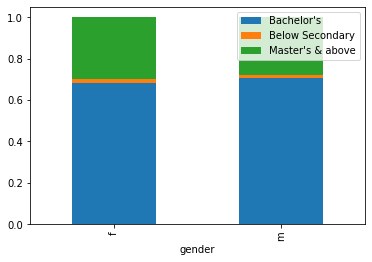

In [26]:
plt.figure(figsize=(10,5))
Gender=pd.crosstab(train['gender'],train['education'],) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.legend(loc='best')

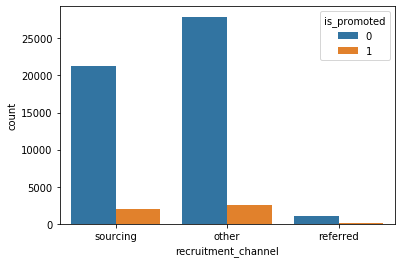

In [27]:
# recruitment channel
sns.countplot(train['recruitment_channel'],hue=train['is_promoted'])

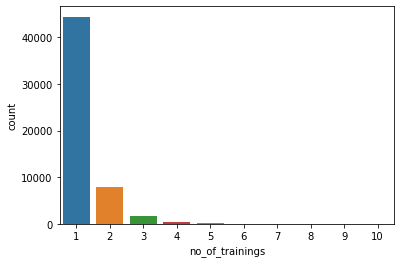

In [28]:
sns.countplot(train['no_of_trainings'])

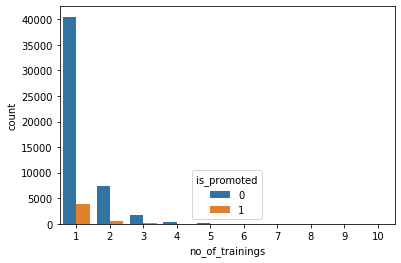

In [29]:
sns.countplot(train['no_of_trainings'],hue=train['is_promoted'])

there is no significant relation between number of trainings and promotions

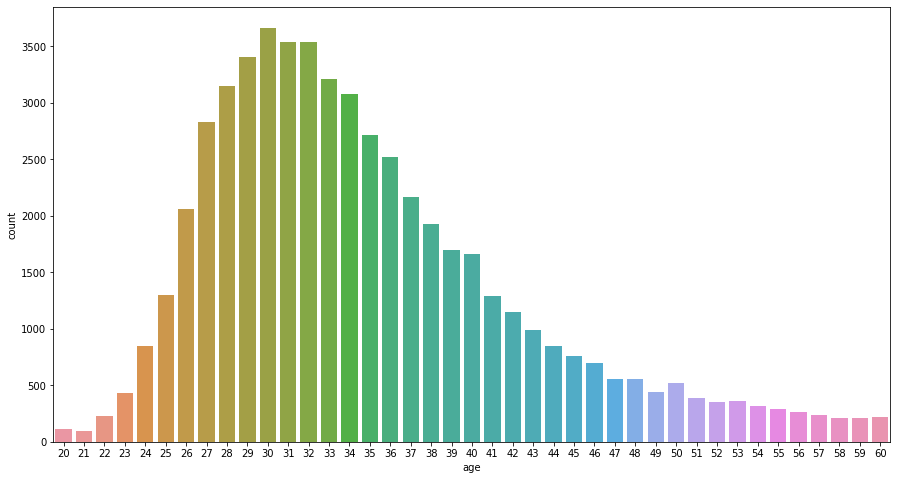

In [30]:
# check out the age
plt.figure(figsize=(15,8))
sns.countplot(train['age'])

most of the employees are in the range of 26 to 37 age

<Figure size 1440x720 with 0 Axes>

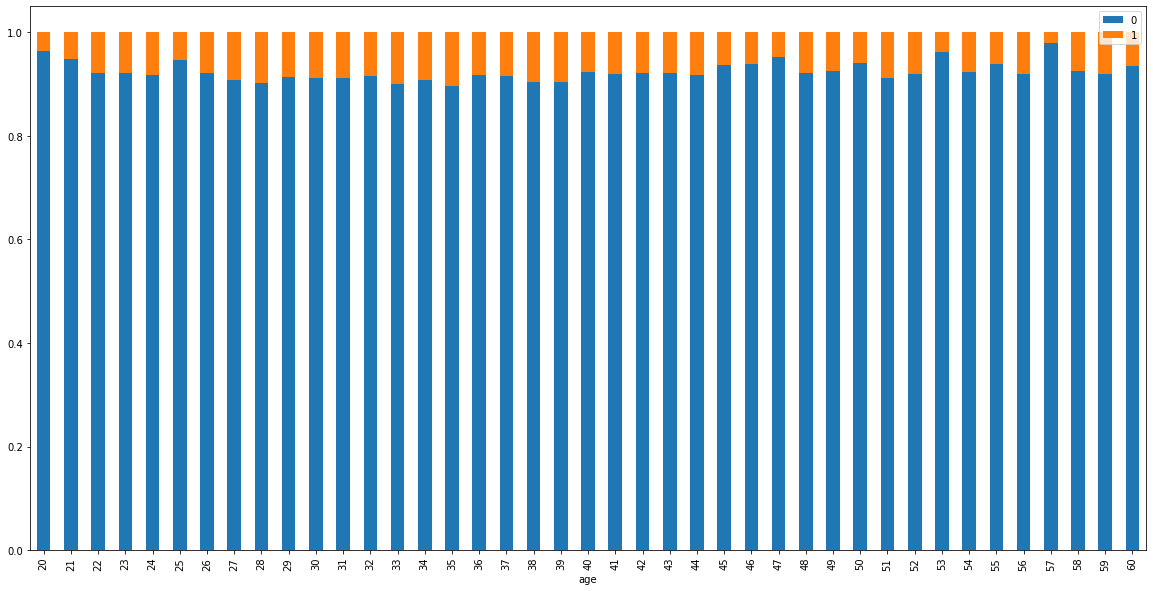

In [31]:
plt.figure(figsize=(20,10))

Gender=pd.crosstab(train['age'],train['is_promoted'],) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20,10))
plt.legend(loc='best')


In [32]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


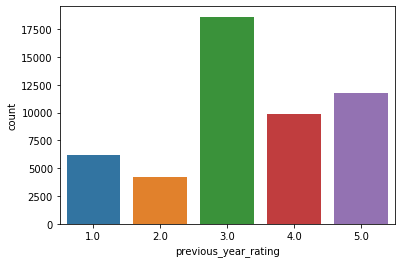

In [33]:
sns.countplot(train['previous_year_rating'])

most of the employees got 3 ratings in their previous working year

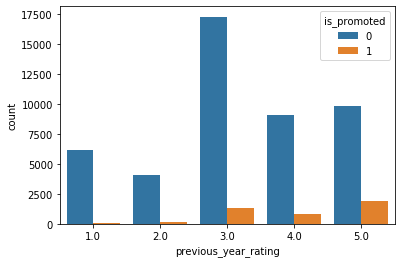

In [34]:
sns.countplot(train['previous_year_rating'],hue=train['is_promoted'])

 it is obvious, who will have great ratings will get most promotions as we mentioned in the hypothesis

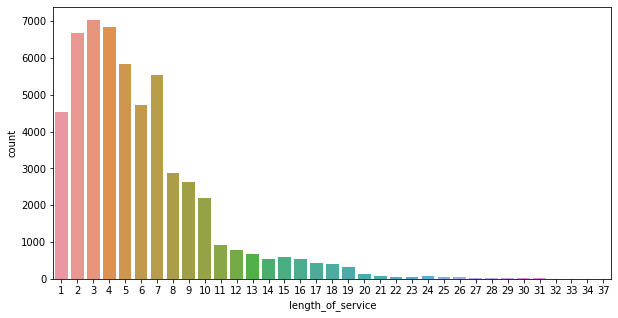

In [35]:
# service year
plt.figure(figsize=(10,5))
sns.countplot(train['length_of_service'])

<Figure size 1440x720 with 0 Axes>

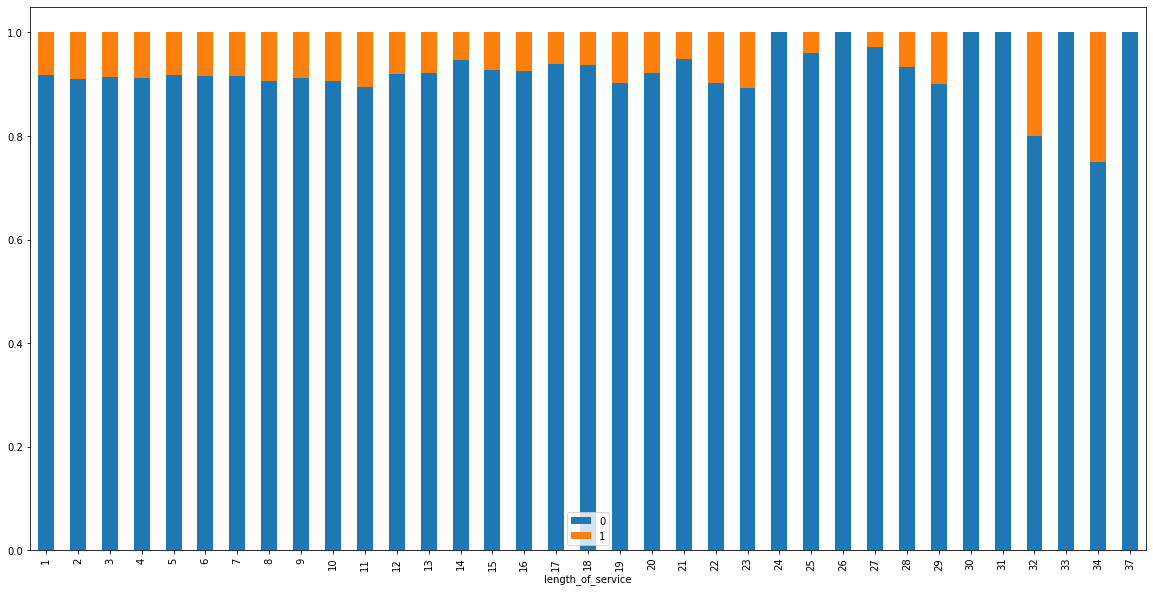

In [36]:
plt.figure(figsize=(20,10))

Gender=pd.crosstab(train['length_of_service'],train['is_promoted'],) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20,10))
plt.legend(loc='best')

 it seems like my hypothesis was a little bit correct which was saying that employees who are in the company for long service will get most promotions.
employees who are there in the company for 32 and 34 years got most promotions but some of the employees have not got any promotions even they are in the company for 37 years. it might be happened because of KPI or ratings.

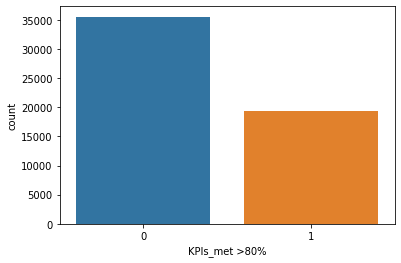

In [37]:
sns.countplot(train['KPIs_met >80%'])

most of the employees have got less than 80% 

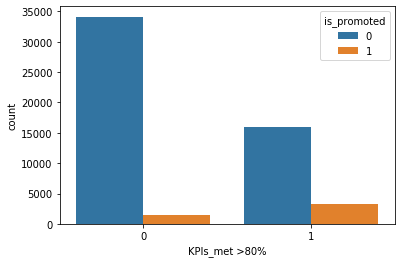

In [38]:
sns.countplot(train['KPIs_met >80%'],hue=train['is_promoted'])

employees who met KPI>80% got more promotions

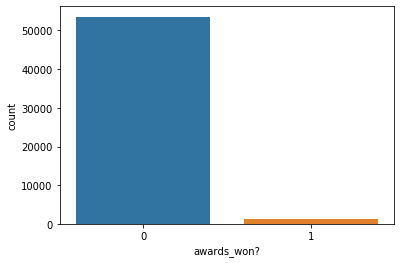

In [39]:
sns.countplot(train['awards_won?'])

most of the employees haven't won any awards

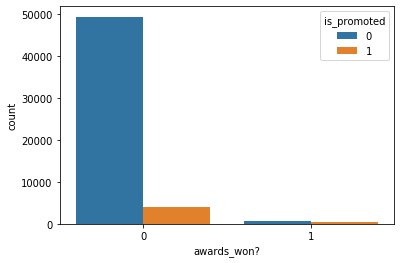

In [40]:
sns.countplot(train['awards_won?'],hue=train['is_promoted'])

it seems like my hypothisis was wrong there is no significance relation between awards and promotions

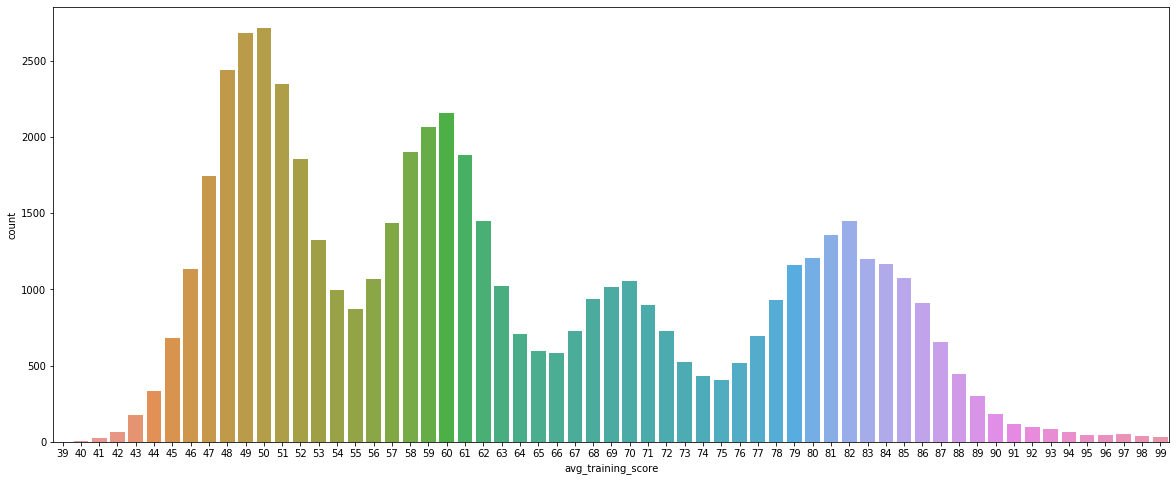

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(train['avg_training_score'])

<Figure size 1440x720 with 0 Axes>

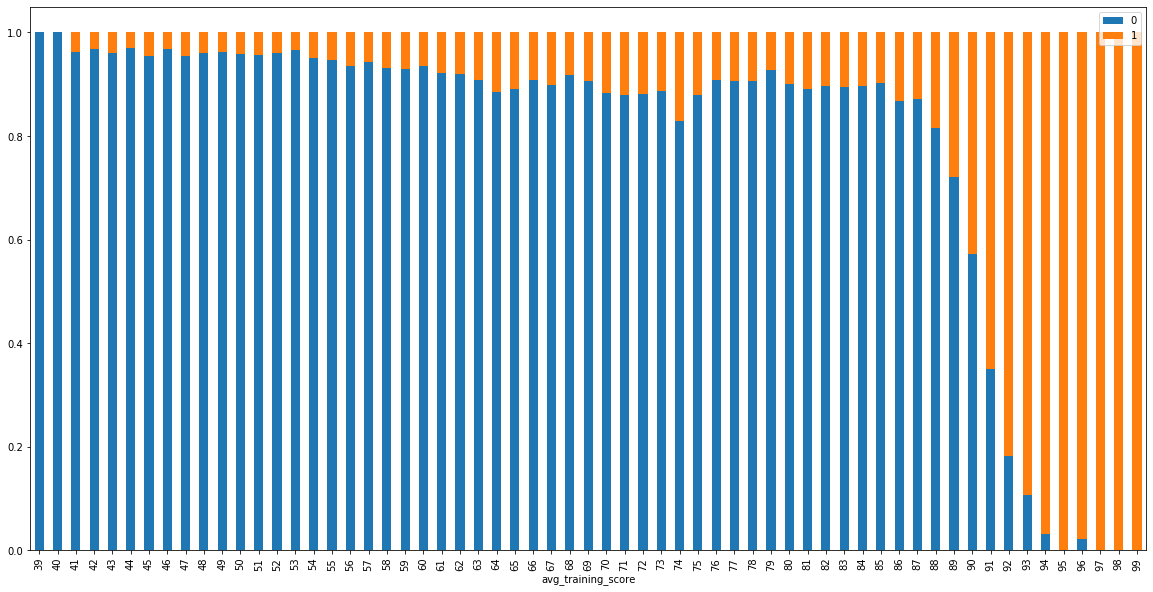

In [42]:
plt.figure(figsize=(20,10))

score=pd.crosstab(train['avg_training_score'],train['is_promoted'],) 
score.div(score.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20,10))
plt.legend(loc='best')

we can see there is a strong relation between average training score and promotions

In [43]:
# lets handle missing values
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [44]:
train['education']=train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].median())
test['education']=test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].median())

In [45]:
df_train=train.copy()

In [46]:
df_train['education']=df_train['education'].map({ "Bachelor's":0,'Below Secondary':1,"Master's & above":2})
df_train['gender']=df_train['gender'].map({ 'f':0,'m':1})
df_train['recruitment_channel']=df_train['recruitment_channel'].map({ "other":0,'referred':1,"sourcing":2})
df_train['no_of_trainings']=df_train['no_of_trainings'].apply(lambda x: 0 if x<5 else 1 if x<8 else 2)
df_train['age']=df_train['age'].apply(lambda x: 0 if x<30 else 1 if x<40 else 2 if x<50 else 3)
df_train['length_of_service']=df_train['length_of_service'].apply(lambda x: 0 if x<10 else 1 if x<20 else 2 if x<30 else 3)
df_train['avg_training_score']=df_train['avg_training_score'].apply(lambda x: 0 if x<50 else 1 if x<60 else 2 if x<70 else 3 if x<80 else 4 if x<90 else 5)


In [62]:
test['education']=test['education'].map({ "Bachelor's":0,'Below Secondary':1,"Master's & above":2})
test['gender']=test['gender'].map({ 'f':0,'m':1})
test['recruitment_channel']=test['recruitment_channel'].map({ "other":0,'referred':1,"sourcing":2})
test['no_of_trainings']=test['no_of_trainings'].apply(lambda x: 0 if x<5 else 1 if x<8 else 2)
test['age']=test['age'].apply(lambda x: 0 if x<30 else 1 if x<40 else 2 if x<50 else 3)
test['length_of_service']=test['length_of_service'].apply(lambda x: 0 if x<10 else 1 if x<20 else 2 if x<30 else 3)
test['avg_training_score']=test['avg_training_score'].apply(lambda x: 0 if x<50 else 1 if x<60 else 2 if x<70 else 3 if x<80 else 4 if x<90 else 5)


In [47]:
test=pd.get_dummies(data=test,columns=['department','region'],drop_first=True)
test.drop('employee_id',axis=1,inplace=True)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2,0,2,0,1,5.0,0,1,0,0,0
1,65141,Operations,region_22,0,1,0,0,1,5.0,0,0,0,2,0
2,7513,Sales & Marketing,region_19,0,1,2,0,1,3.0,0,0,0,1,0
3,2542,Sales & Marketing,region_23,0,1,0,0,1,1.0,1,0,0,1,0
4,48945,Technology,region_26,0,1,0,0,2,3.0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,0,1,2,0,2,3.0,1,0,0,3,0
54804,74592,Operations,region_27,2,0,0,0,1,2.0,0,0,0,1,0
54805,13918,Analytics,region_1,0,1,0,0,0,5.0,0,1,0,3,0
54806,13614,Sales & Marketing,region_9,0,1,2,0,0,1.0,0,0,0,0,0


In [48]:
encode=pd.get_dummies(data=df_train,columns=['department','region'],drop_first=True)

In [49]:
encode.drop('employee_id',axis=1,inplace=True)

In [50]:
X=encode.drop(['is_promoted'],axis=1)
y=encode['is_promoted']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
log=LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
score =f1_score(y_test,y_pred)
print('F1 score :',score)


F1 score : 0.2975352112676057


In [53]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)
y_pred=random.predict(X_test)
score =f1_score(y_test,y_pred)
print('F1 score :',score)

F1 score : 0.43134535367545074


In [54]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
score =f1_score(y_test,y_pred)
print('F1 score :',score)

F1 score : 0.4229149115417018


In [55]:
# we got F1 score about 43, it is less because our data is Imbalanced
# we will go for Oversampling

In [56]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X_sample,y_sample=os.fit_sample(X,y)

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X_sample,y_sample,test_size=0.2,random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
score =f1_score(y_test,y_pred)
print('F1 score :',score)

accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

print('Accuracy score :',accuracy)
print('Matrix :',matrix)
print('Report :\n',report)

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F1 score : 0.7752245769020795
Accuracy score : 0.7741822895891504
Matrix : [[7717 2264]
 [2265 7810]]
Report :
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      9981
           1       0.78      0.78      0.78     10075

    accuracy                           0.77     20056
   macro avg       0.77      0.77      0.77     20056
weighted avg       0.77      0.77      0.77     20056



In [59]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=1000)
random.fit(X_train,y_train)
y_pred=random.predict(X_test)
score =f1_score(y_test,y_pred)
print('F1 score :',score)

accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

print('training score :',random.score(X_train,y_train))
print('testing score :',accuracy)
print('Matrix :',matrix)
print('Report :\n',report)

F1 score : 0.9420962850644428
training score : 0.954215696051057
testing score : 0.9390706023135221
Matrix : [[8893 1088]
 [ 134 9941]]
Report :
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      9981
           1       0.90      0.99      0.94     10075

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



In [60]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
score =f1_score(y_test,y_pred)
print('F1 score :',score)

F1 score : 0.8244369569072532


In [61]:
# random forest gave me better score after appying over sampling 

In [63]:
random=RandomForestClassifier()
random.fit(X_sample,y_sample)
y_pred=random.predict(test)
random_forest=pd.DataFrame(columns=['employee_id','is_promoted'])
random_forest['employee_id']=submission['employee_id']
random_forest['is_promoted']=y_pred
random_forest.to_csv('random_forest_submission.csv',index=False)

NameError: name 'encode1' is not defined

In [ ]:
random.score(X_sample,y_sample)